In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='notebook', style='dark')

In [386]:
movies_df = pd.read_csv('data/Movies with sequels.csv')
movies_df.drop(['const', 'created', 'modified', 'description', 'Num. Votes', 'URL'], 1, inplace=True)
movies_df.drop([747, 748], inplace=True);
ix = movies_df[~(movies_df['IMDb Rating'] > 0)].index.values
movies_df.drop(ix, inplace=True)
movies_df.reset_index(inplace=True)
movies_df.drop(['index', 'position'], 1, inplace=True)
movies_df.tail(50)

,Title,Title type,Directors,IMDb Rating,Runtime (mins),Year,Genres,Release Date (month/day/year)
924,The Base,Video,Mark L. Lester,4.5,93,1999,"action, drama",1999-03-25
925,Guilty as Charged,TV Movie,Mark L. Lester,4.3,97,2000,"action, adventure",2000-10
926,Fright Night,Feature Film,Tom Holland,7.1,106,1985,"comedy, horror, thriller",1985-08-02
927,Fright Night Part 2,Feature Film,Tommy Lee Wallace,5.8,104,1988,"comedy, horror, thriller",1988-10
928,Fright Night,Feature Film,Craig Gillespie,6.4,106,2011,"comedy, horror",2011-08-14
929,Fright Night 2,Video,Eduardo Rodriguez,4.3,100,2013,"comedy, horror, thriller",2013-10-01
930,Child's Play,Feature Film,Tom Holland,6.5,87,1988,"horror, mystery, thriller",1988-11-09
931,Child's Play 2,Feature Film,John Lafia,5.7,84,1990,horror,1990-11-09
932,Child's Play 3,Feature Film,Jack Bender,4.9,90,1991,"horror, thriller",1991-08-30
933,Bride of Chucky,Feature Film,Ronny Yu,5.3,89,1998,"comedy, horror",1998-10-15


In [387]:
movies_df.describe()

,IMDb Rating,Runtime (mins)
count,974.000000,965.000000
mean,6.141478,103.755440
std,1.260085,18.492128
min,1.400000,21.000000
25%,5.300000,92.000000
50%,6.300000,100.000000
75%,7.100000,113.000000
max,9.200000,201.000000


In [388]:
movies_df.shape

(974, 8)

In [389]:
len(movies_df)

974

In [390]:
sequels = []
series = [0]
first_title = movies_df.iloc[series[0]].Title.lower()
first_directors = movies_df.iloc[series[0]].Directors.lower()
first_genres = movies_df.iloc[series[0]].Genres.lower()

# print(0, first_title, '-', first_directors)
series_titles = [first_title]

for i in range(series[0]+1, len(movies_df)-1):
    try:
        title = movies_df.iloc[i].Title.lower().replace('the ', '')
        genres = movies_df.iloc[i].Genres.lower()

    #     title = title.replace('the ', '')

        directors = movies_df.iloc[i].Directors
    
    except:
        print(i, movies_df.iloc[i].position)
#     print(i, directors, 'vs', first_directors)
#     print(i, title, 'vs', first_title)
    
    if str(directors) in str(first_directors) or str(first_directors) in str(directors):
#         print('check!\n')
        series.append(i)
        series_titles.append(title)
    elif first_title in title or title in first_title or title.split(' ')[0] in first_title:
#         print('check!\n')
        series.append(i)
        series_titles.append(title)
#     elif genres == first_genres:
#         series.append(i)
#         series_titles.append(title)
    elif title in movies_df.iloc[i-1].Title.lower().replace('the ', ''):
        series.append(i)
        series_titles.append(title)
    else:
#         print('no good')
#         print(series_titles)
        sequels.append(series)
        series = [i]
        first_title = movies_df.iloc[i].Title.lower().replace('the ', '')
        series_titles = [first_title]
        first_directors = movies_df.iloc[i].Directors
        first_genres = movies_df.iloc[i].Genres.lower()
        
#         break
        
#     if i > 60:
#         print('enough')
#         break

# # sequels.append(series)
# print('\nsequels so far: ', sequels)
# print('new series: ', series, '... ', i)
# print('new title: ', title)

In [473]:
for i in range(len(sequels)-1):
#     print(i)
#     try:
    if len(sequels[i]) == 1:
        seq = sequels[i]
#         print(seq)
#         print(seq, movies_df.iloc[seq].Title.values)
        if int(movies_df.iloc[i].Year) > int(movies_df.iloc[i-1].Year):
#             print('.')
            sequels[i-1].append(sequels[i][0])
            sequels.remove(sequels[i])
        elif int(movies_df.iloc[i].Year) < int(movies_df.iloc[i+1].Year):
#             print('..')
            sequels[i+1].append(sequels[i][0])
            sequels[i+1] = sorted(sequels[i+1])
            sequels.remove(sequels[i])
#         else:
#             print('uhu')
#     except:
#         print('.')
#         continue

In [474]:
# sequels

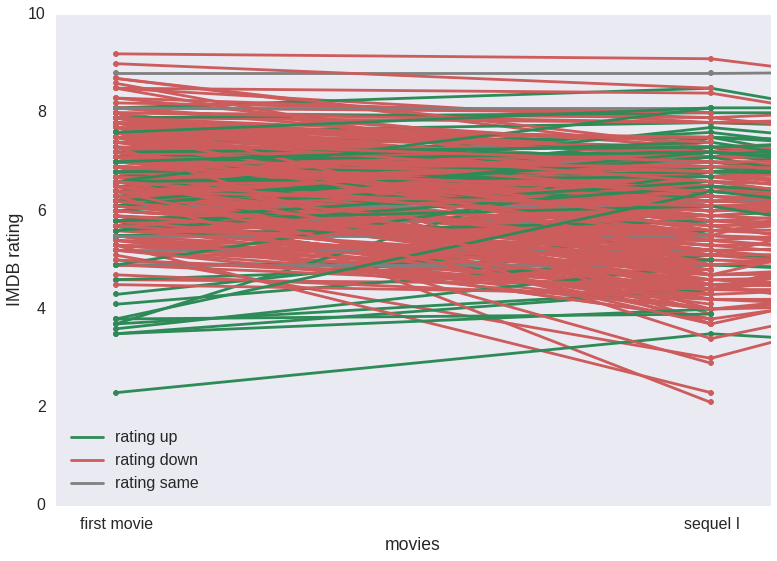

In [471]:
sns.set(context='poster', style='dark')

plt.fig, plt.ax = plt.subplots()

for seq in sequels:
#     movies_df.iloc[seq].plot(y='IMDb Rating')
    y = movies_df.iloc[seq]['IMDb Rating'].values
#     plt.scatter(list(zip(*enumerate(y)))[0], list(zip(*enumerate(y)))[1])
    if y[1] > y[0]:
        plt.ax.plot(y, '.-', c='seagreen')
    elif y[1] < y[0]:
        plt.ax.plot(y, '.-', c='indianred')
    else:
        plt.ax.plot(y, '.-', c='gray')
        
plt.ax.plot(0,0, c='seagreen', label='rating up')
plt.ax.plot(0,0, c='indianred', label='rating down')
plt.ax.plot(0,0, c='grey', label='rating same')

plt.xlim([-0.1, 1.1])

labels = [item.get_text() for item in plt.ax.get_xticklabels()]
labels[1] = 'first movie'
labels[6] = 'sequel I'
# labels[7] = 'Sequel II'

plt.ax.set_xticklabels(labels)
# print(labels)

plt.xlabel('movies')
plt.ylabel('IMDB rating')
plt.legend(loc='best')

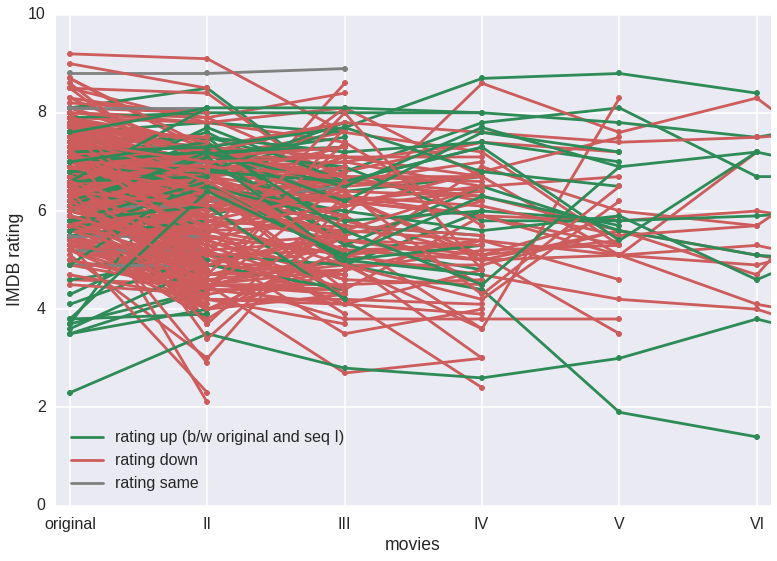

In [470]:
sns.set(context='poster')

plt.fig, plt.ax = plt.subplots()

for seq in sequels:
#     movies_df.iloc[seq].plot(y='IMDb Rating')
    y = movies_df.iloc[seq]['IMDb Rating'].values
#     plt.scatter(list(zip(*enumerate(y)))[0], list(zip(*enumerate(y)))[1])
    if y[1] > y[0]:
        plt.ax.plot(y, '.-', c='seagreen')
    elif y[1] < y[0]:
        plt.ax.plot(y, '.-', c='indianred')
    else:
        plt.ax.plot(y, '.-', c='gray')
        
plt.ax.plot(0,0, c='seagreen', label='rating up (b/w original and seq I)')
plt.ax.plot(0,0, c='indianred', label='rating down')
plt.ax.plot(0,0, c='grey', label='rating same')

plt.xlim([-0.1, 5.1])

labels = [item.get_text() for item in plt.ax.get_xticklabels()]
labels[1] = 'original'
labels[2] = 'II'
labels[3] = 'III'
labels[4] = 'IV'
labels[5] = 'V'
labels[6] = 'VI'

plt.ax.set_xticklabels(labels)
# print(labels)

plt.xlabel('movies')
plt.ylabel('IMDB rating')
plt.legend(loc='best')